<a href="https://colab.research.google.com/github/ElianaMontoya21/project-predictions/blob/main/Metro_Interstate_Traffic_Volume_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [4]:
# Import the data
path = '/Metro_Interstate_Traffic_Volume.csv'
df = pd.read_csv(path)
df


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [5]:
#Eliminar la columna 'weather_main' ya que es lo mimo que 'weather_description', sólo que esta ultimaesmás especifica que la primera, por eso veo innecesaria tener las dos
df= df.drop(columns=['weather_main'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_description  48204 non-null  object 
 6   date_time            48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 2.9+ MB


#**LIMPIEZA DE DATOS**

In [7]:
#REVISANDO SI HAY FILAS DUPLICADAS
df.duplicated().sum()


17

In [8]:
# Eliminar los datos duplicados
df = df.drop_duplicates()
df.duplicated().sum()

0

In [9]:
#Verificandosi hay algún valor faltante 
df.isna().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [10]:
#identificar y tratar cualquier incoherencia en los valores categoricos
df['holiday'].value_counts()

None                         48126
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64

In [12]:
df['weather_description'].value_counts()

sky is clear                           11659
mist                                    5949
overcast clouds                         5079
broken clouds                           4663
scattered clouds                        3460
light rain                              3372
few clouds                              1956
light snow                              1945
Sky is Clear                            1725
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1099
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             124
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

In [13]:
df['date_time'].value_counts()

2013-04-18 22:00:00    6
2013-05-19 10:00:00    6
2012-12-16 21:00:00    5
2013-12-03 14:00:00    5
2015-07-06 13:00:00    5
                      ..
2015-07-03 21:00:00    1
2015-07-03 22:00:00    1
2015-07-03 23:00:00    1
2015-07-04 00:00:00    1
2018-09-30 23:00:00    1
Name: date_time, Length: 40575, dtype: int64

In [14]:
#identificando valores Inusuales
df['clouds_all'].value_counts()

90     16437
1      12754
75      5068
40      3992
0       1987
20      1849
64      1558
5       1094
92       776
12       273
8        270
24       186
32       185
88       183
80       181
48       180
68       179
36       169
56       164
76       153
44       147
100       94
99        44
93        34
98        21
87        18
85        17
59        16
96        14
57        13
89        13
91        12
81        11
46         9
97         8
77         7
6          6
63         5
11         5
83         5
16         5
25         4
70         4
58         4
72         3
13         3
3          3
4          3
2          2
50         2
62         2
67         2
42         2
86         2
38         2
60         2
54         2
84         1
17         1
78         1
Name: clouds_all, dtype: int64

In [15]:
# no se ven valores inusuales 

#**VISUALIZACIÓN DE LOS DATOS**

In [16]:
import matplotlib.pyplot as plt

In [17]:
tempertura = df.temp

In [18]:
traffic = df.traffic_volume

Text(0.5, 0, 'cantidad de personas por día de personas en el metro ')

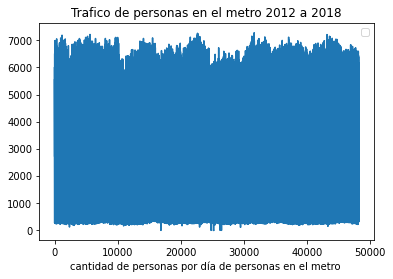

In [19]:
plt.plot(traffic)
plt.legend()

plt.title("Trafico de personas en el metro 2012 a 2018")
#Etiqueta de los ejes 
plt.xlabel("cantidad de personas por día de personas en el metro ")

In [20]:
prom_pasag = df.groupby('holiday' )['traffic_volume'].mean().round(2)
prom_pasag

holiday
Christmas Day                 827.50
Columbus Day                  519.40
Independence Day             1076.00
Labor Day                    1013.14
Martin Luther King Jr Day     612.67
Memorial Day                 1107.60
New Years Day                1356.00
None                         3262.65
State Fair                    634.80
Thanksgiving Day              933.50
Veterans Day                  691.40
Washingtons Birthday          635.20
Name: traffic_volume, dtype: float64

In [21]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


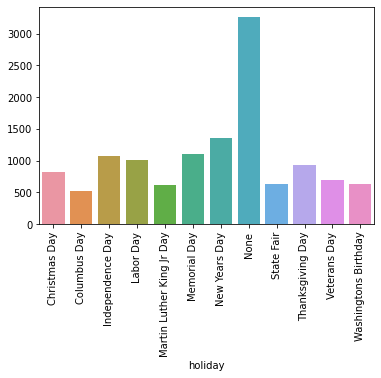

In [46]:
sns.barplot(prom_pasag.index, prom_pasag.values);
plt.xticks(rotation = 90);

el grafico anterior muestra que aparte de losdías que no son festivos, hay algunos festivos que en promedio se movilizan más pasajeros por hora que en otros festivos, como año nuevo 

**Mapa de calor de Correlación**

In [32]:
matriz_corr= df.corr()
matriz_corr

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.009070,-0.019756,-0.101968,0.130161
rain_1h,0.009070,1.000000,-0.000090,0.004818,0.004715
snow_1h,-0.019756,-0.000090,1.000000,0.027934,0.000736
clouds_all,-0.101968,0.004818,0.027934,1.000000,0.067138
traffic_volume,0.130161,0.004715,0.000736,0.067138,1.000000


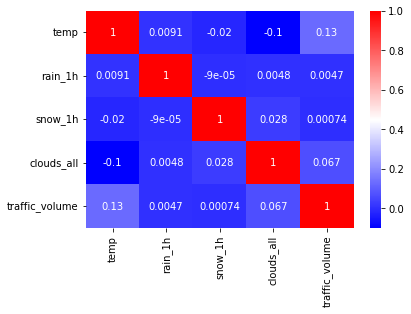

In [37]:
#Matriz de Correlación
sns.heatmap(matriz_corr, cmap = "bwr", annot = True)


Deacuerdoal mapade calor anterior hay una leve correlación positiva de 0.13 entre traffic_volume y temp